In [2]:
choices = ['noun_removal', 'noun_style', 'noun_general', 'noun_abstract',
                             'adj_noun','adj_noun_0','adj_noun_1',
                             'adj_general','adj_specific',
                             'steps_adj','steps_noun']
path = '/home/banyh2000/diffusion/daam/wrapupdata/rebuttal/generalize'

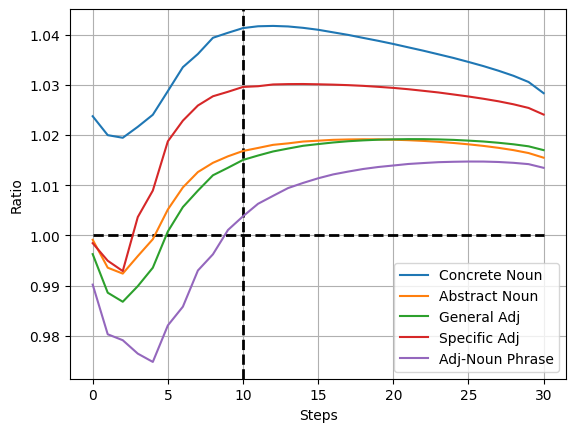

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
    

fig, ax = plt.subplots()
ax.grid(True)
# plot base as dotted line

base = np.ones(31)
negative_list = []
ax.plot(base,linestyle='--', linewidth=2, color='black' )
ax.axvline(10, linestyle='--', color='black', linewidth=2)

choice = 'noun_removal'
with open(f'{path}/{choice}.json') as f:
    data = json.load(f)
ratios = []
for i,dic in enumerate(data):
    negative_list.append(dic['negative_prompt'])
    ratio = np.mean(np.array(dic['ratio']),axis=0)
    ratios.append(ratio)
ratios = np.array(ratios)
rank = ratios[:,-1]/ratios[:,6]
# sort ratios by rank
ratios = ratios[np.argsort(rank,)]
ratios = ratios[20:100]
ratios = np.mean(ratios,axis=0)
ax.plot(ratios, label="Concrete Noun")

choice = 'noun_abstract'
with open(f'{path}/{choice}.json') as f:
    data = json.load(f)
ratios = []
for i,dic in enumerate(data):
    negative_list.append(dic['negative_prompt'])
    ratio = np.mean(np.array(dic['ratio']),axis=0)
    ratios.append(ratio)
ratios = np.array(ratios)
rank = ratios[:,-1]/ratios[:,6]
# sort ratios by rank
ratios = ratios[np.argsort(rank,)]
ratios = np.mean(ratios,axis=0)
ax.plot(ratios,label='Abstract Noun')

choice = 'adj_general'
with open(f'{path}/{choice}.json') as f:
    data = json.load(f)
ratios = []
for i,dic in enumerate(data):
    negative_list.append(dic['negative_prompt'])
    ratio = np.mean(np.array(dic['ratio']),axis=0)
    ratios.append(ratio)
ratios = np.array(ratios)
rank = ratios[:,20]/ratios[:,-1]
# sort ratios by rank
ratios = ratios[np.argsort(rank,)]
ratios = ratios[:200]
ratios = np.mean(ratios,axis=0)
ax.plot(ratios,label='General Adj')

choice = 'adj_specific'
with open(f'{path}/{choice}.json') as f:
    data = json.load(f)
    ratios = []
for i,dic in enumerate(data):
    negative_list.append(dic['negative_prompt'])
    ratio = np.mean(np.array(dic['ratio']),axis=0)
    ratios.append(ratio)
ratios = np.array(ratios)
rank = ratios[:,0]/ratios[:,-1]
# sort ratios by rank
ratios = ratios[np.argsort(rank,)]
ratios = ratios[:80]
ratios = np.mean(ratios,axis=0)
ax.plot(ratios,label = 'Specific Adj')

choice = 'adj_noun'
with open(f'{path}/{choice}.json') as f:
    data = json.load(f)
ratios = []
for i,dic in enumerate(data):
    negative_list.append(dic['negative_prompt'])
    ratio = np.mean(np.array(dic['ratio']),axis=0)
    ratios.append(ratio)
ratios = np.array(ratios)
rank = ratios[:,-1]/ratios[:,6]
# sort ratios by rank
ratios = ratios[np.argsort(rank,)]
ratios = ratios[100:]

ratios = np.mean(ratios,axis=0)
ax.plot(ratios,label='Adj-Noun Phrase')

ax.set_xlabel('Steps')
ax.set_ylabel('Ratio')
# ax.set_title(f'{choice}')
ax.legend()
fig.show()
fig.savefig('when_ratio_rebuttal_part.png')

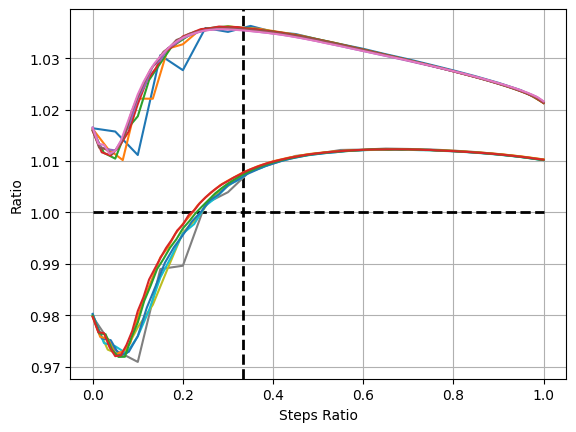

In [26]:
import json
import matplotlib.pyplot as plt
import numpy as np

steps = [20, 30, 40, 50, 60, 70, 80]

base = np.ones(31)
xval = np.linspace(0,1,31)
negative_list = []
fig, ax = plt.subplots()
ax.grid(True)
# plot base as dotted line
ax.plot(xval, base,linestyle='--', linewidth=2, color='black' )
ax.axvline(10/30, linestyle='--', color='black', linewidth=2)

choice = 'steps_noun'
with open(f'{path}/{choice}.json') as f:
    data = json.load(f)
ratios = {20:[],30:[],40:[],50:[],60:[],70:[],80:[]}
for i,dic in enumerate(data):
    negative_list.append(dic['negative_prompt'])
    ratio = np.mean(np.array(dic['ratio']),axis=0)
    ratios[dic['steps']].append(ratio)

for key, value in ratios.items():
    ratios[key] = np.mean(value,axis=0)
    lens = len(ratios[key])
    xval = np.linspace(0,1,lens)
    ax.plot(xval, ratios[key])

choice = 'steps_adj'
with open(f'{path}/{choice}.json') as f:
    data = json.load(f)
ratios = {20:[],30:[],40:[],50:[],60:[],70:[],80:[]}
for i,dic in enumerate(data):
    negative_list.append(dic['negative_prompt'])
    ratio = np.mean(np.array(dic['ratio']),axis=0)
    ratios[dic['steps']].append(ratio)

for key, value in ratios.items():
    ratios[key] = np.mean(value,axis=0)
    lens = len(ratios[key])
    xval = np.linspace(0,1,lens)
    ax.plot(xval, ratios[key])

ax.set_xlabel('Steps Ratio')
ax.set_ylabel('Ratio')
# ax.set_title("")
# fig.legend(['20','30','40','50','60','70','80'])
fig.show()
fig.savefig('when_ratio_time.png')

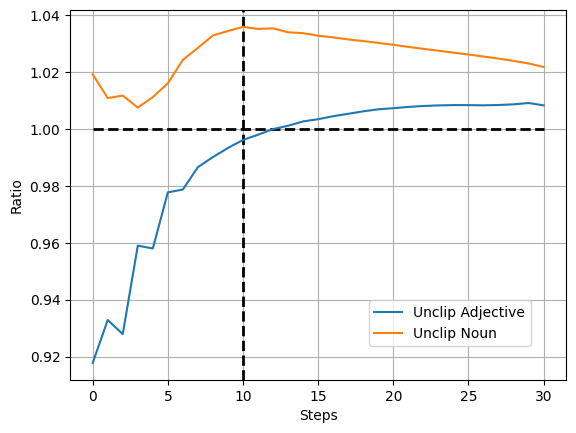

In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np
    
base = np.ones(31)
negative_list = []
fig, ax = plt.subplots()
ax.grid(True)
# plot base as dotted line
ax.plot(base,linestyle='--', linewidth=2, color='black' )
ax.axvline(10, linestyle='--', color='black', linewidth=2)

# choice = 'unclip_noun'
# with open(f'{path}/{choice}.json') as f:
#     data = json.load(f)    
# for dic in data:
#     if dic['negative_prompt'] in negative_list:
#         continue
#     ratio = np.mean(np.array(dic['ratio']),axis=0)
#     ax.plot(ratio)
#     ax.set_xlabel('Steps')
#     ax.set_ylabel('Ratio')
    
choice = 'unclip_adj'
with open(f'{path}/{choice}.json') as f:
    data = json.load(f)    
ratios = []
for i,dic in enumerate(data):
    
    negative_list.append(dic['negative_prompt'])
    ratio = np.mean(np.array(dic['ratio']),axis=0)
    if ratio[-1] < 1:
        continue
    ratios.append(ratio)
ratios = np.array(ratios)
ratios = np.mean(ratios,axis=0)
ax.plot(ratios, label="Unclip Adjective")

choice = 'unclip_noun'
with open(f'{path}/{choice}.json') as f:
    data = json.load(f)
ratios = []
for i,dic in enumerate(data):
    negative_list.append(dic['negative_prompt'])
    if ratio[-1]/ratio[10] < 1.0:
        continue
    ratio = np.mean(np.array(dic['ratio']),axis=0)
    ratios.append(ratio)
ratios = np.array(ratios)
ratios = np.mean(ratios,axis=0)
ax.plot(ratios,label="Unclip Noun")


ax.set_xlabel('Steps')
ax.set_ylabel('Ratio')
fig.legend(loc=(0.64,0.2))
fig.show()
fig.savefig('when_ratio_unclip.png')